In [1]:
import numpy as np
import scipy.constants as const
import pandas as pd
from scipy.integrate import quad
import matplotlib.pyplot as plt
g=const.g
import scipy
import json


In [2]:
#плотность воды при разных температурах,кг/м3
#T_К,Тстан=277(К)
def rho(T):
    rho=1000/(1+((T-273)/10000*(0.269*(T-273)**0.637-0.8)))
    return rho

In [3]:
#cosa-учет инклинометрии скважины
df = pd.DataFrame(columns=['MD', 'TVD'], data=[[0, 0], [384.50,310.5], [ 769, 325]])
df

,MD,TVD
0,0.0,0.0
1,384.5,310.5
2,769.0,325.0


In [4]:
MD=df['MD']
TVD=df['TVD']
cos_a=np.zeros(len(MD))
for i in range (1,len(MD)):
    cos_a[i]=(TVD[i]-TVD[i-1])/(MD[i]-MD[i-1])

In [5]:
def Cos_angle(x):
    if x <= MD[1]:
        cos=cos_a[1]
    else: 
        cos=cos_a[2]
    return cos    
# print(Cos_angle(334.5)

In [6]:
#число Рейнольдса
def Re(rho,mu,d,v):
    #rho - kg/m3
    #mu - Pa*s
    #d - m
    #v-m/s
    return (rho*v*d)/(mu)

In [7]:
def mu(P,T):
    #T-K
    #P-MPa
    A= 109.574
    B= 1.1217
    m= A *((1.8*T - 460)**(-B))*( 0.9994 + 0.0058*P/10**6 + 0.6534 * 10**(-4)*(P/10**6)**2)
    return m/10**6

In [8]:
#определение коэфициента трения согласно режиму течения
#e-m
def friction(Re):
    if Re<3000:
        f=64/Re
    else:
        f=1/(1.14-2*np.log10(e/d+21.25/Re**0.9))**2
    return f   

In [9]:
#функция определения температуры
def tempreture(x):
    if x<=MD[1]:
        y=Cos_angle(x)*x
    else:
        y=Cos_angle(x)*(x - MD[1])+TVD[1]
    return T_0 + y*(T_wf-T_0)/TVD[2]


In [10]:
#функция определения производной давления по координате 
def dp_dx(x):
    T=tempreture(x)  
    P=p[-1]
    mu_x=mu(P,T)
    rho_x=rho(T)
    Re_x=Re(rho_x,mu_x,d,v)
#     print(Re_x)
    dp_dx=rho_x*g*Cos_angle(x)-((friction(Re_x)*rho_x*v**2)/(d*2))
#     print("dp_dx=",dp_dx)
    return dp_dx

In [11]:
#Расчет распределения давления в скважине 
e=8*10**(-5)
d=148*10**(-3)
Q=888/86400
v=4*Q/(const.pi*d**2)
P_wh=22.9 * 101325 # P=22.9 atm
T_0=299.2 #T=26.2 C
T_wf=299.2+50
H=769
l=np.linspace(0,H,100)
p=[]
p.append(P_wh)
for i in range(len(l)-1):
    p.append(p[-1]+ quad(dp_dx,l[i],l[i+1])[0])
#     print(p)    
p_atm = [i/101325 for i in p]

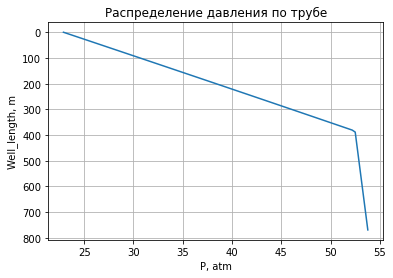

In [12]:
plt.plot(p_atm,l)
plt.title('Распределение давления по трубе')
ax=plt.gca()
ax.invert_yaxis()
plt.grid()
plt.xlabel('P, atm')
plt.ylabel('Well_length, m')
plt.show()

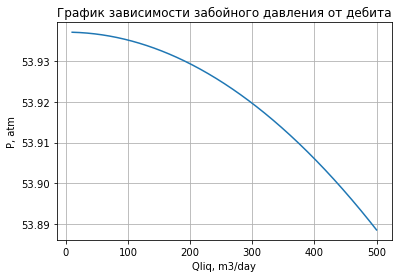

In [13]:
#График зависимости забойного давления от дебита
Q=np.linspace(10/86400,500/86400,491)
e=8*10**(-5)
d=148*10**(-3)
P_wh=22.9 * 101325 # P=22.9 atm
T_0=299.2 #T=26.2 C
T_wf=299.2+50
H=769
l=np.linspace(0,H,100)
p_res=[]
for q in Q:
    v=4*q/(const.pi*d**2)
    p=[]
    p.append(P_wh)
    for i in range(len(l)-1):
        p.append(p[-1]+ quad(dp_dx,l[i],l[i+1])[0])
    #     print(p)    
    p_res.append(p[-1])
Q_days=[i*86400 for i in Q]
p_at = [i/101325 for i in p_res]
plt.plot(Q_days,p_at)
plt.title('График зависимости забойного давления от дебита')
plt.ylabel('P, atm')
plt.xlabel('Qliq, m3/day')
plt.grid()
plt.show()


41


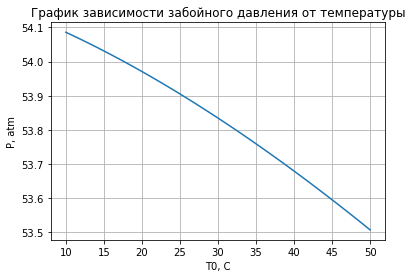

In [14]:
#Зависимость забойного давления от температуры 
Q=888/86400
e=8*10**(-5)
v=4*q/(const.pi*d**2)
d=148*10**(-3)
P_wh=22.9 * 101325 # P=22.9 atm
T_1=np.linspace(10+273,50+273,41)
T_2=np.linspace(60+273,100+273,41)
H=769
l=np.linspace(0,H,100)
p_res=[]
for dt in range (len(T_1)): 
    T_0=T_1[dt]
    T_wf=T_2[dt]
    p=[]
    p.append(P_wh)
    for i in range(len(l)-1):
        p.append(p[-1]+ quad(dp_dx,l[i],l[i+1])[0])
    #     print(p)   
    p_res.append(p[-1]/101325)   
T_C = [i-273 for i in T_1]
print(len(p_res))
plt.plot(T_C,p_res)
plt.title('График зависимости забойного давления от температуры')
plt.ylabel('P, atm')
plt.xlabel('T0, C')
plt.grid()
plt.show()

